## Import Libraries & Loading dataset

In [8]:
# import required libraries
import nltk
import pandas as pd #Handles the dataset (data storage, processing).
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #Used for regular expressions (text cleaning)
import string #Helps in removing punctuations
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split #Splits dataset into training and testing sets.
from sklearn.preprocessing import LabelEncoder #Label Encoding is a method to convert categorical values into numerical labels
from sklearn.feature_extraction.text import TfidfVectorizer #Converts text into numerical features using TF-IDF.
from sklearn.linear_model import LogisticRegression #Trains a Logistic Regression model for sentiment classification
from sklearn.metrics import accuracy_score,classification_report #Evaluates model accuracy and performance.
# Load the dataset(dataset is in csv format)
df=pd.read_csv("UrbanSound8k.csv")
# Display the data structure
df.head(20)





,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.00,0.32,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.50,62.50,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.50,64.50,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.00,67.00,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.50,72.50,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.50,75.50,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.50,84.50,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.50,5.50,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.00,22.00,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.82,5.47,2,10,1,car_horn


## Data preprocessing

In [14]:
# check for missing values
print(df.isnull().sum())
#preprocess the text data
# removal stopwords
stop_words=set(stopwords.words("english"))
def preprocess_text(text):
    # Removing special characters & digits
    text = re.sub(r"[^a-zA-Z\s]", "", text)  
    # Convert to lowercase
    text = text.lower()
    # Removing stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text  
df["cleaned text"]=df["class"].apply(preprocess_text)
print(df["cleaned text"])
# Encode target labels(class) into numerical form
label_encoder = LabelEncoder()
df["class_encoded"]= label_encoder.fit_transform(df['class'])
print(df["class_encoded"])


slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
cleaned text       0
class_encoded      0
dtype: int64
0               dogbark
1       childrenplaying
2       childrenplaying
3       childrenplaying
4       childrenplaying
             ...       
8727            carhorn
8728            carhorn
8729            carhorn
8730            carhorn
8731            carhorn
Name: cleaned text, Length: 8732, dtype: object
0       3
1       2
2       2
3       2
4       2
       ..
8727    1
8728    1
8729    1
8730    1
8731    1
Name: class_encoded, Length: 8732, dtype: int32


## Feature Extraction

TF_IDF Feature Matrix (X):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

Target Variable (y):
0       0
1       0
2       0
3       0
4       0
       ..
8727    0
8728    0
8729    0
8730    0
8731    0
Name: class, Length: 8732, dtype: int64


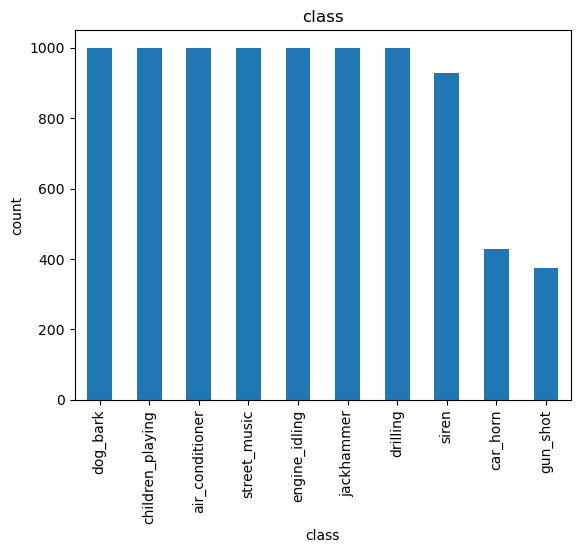

In [11]:
import random #Selecting random samples for machine learning models.
# Tf_Idf Vectorizer(This code performs TF-IDF vectorization, target encoding, and data splitting for a sentiment analysis)
tfidf= TfidfVectorizer(max_features=1000)
X=tfidf.fit_transform(df['class']).toarray()
# Encoding target variable
y=df['class'].apply(lambda x:1 if x == 'positive' else 0) #Lambda is used here to apply a function in one_line without defining a separate function.
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the results
print("TF_IDF Feature Matrix (X):")
print(X)
print("\nTarget Variable (y):")
print(y)
# Exploratory Data Analysis(EDA)
class_counts=df['class'].value_counts()
class_counts.plot(kind="bar", title='class')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

## Model Training

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  # Naïve Bayes for text classification
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np  # Import numpy for mean calculations

# Splitting with stratification
print("class in y:", y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Class in y_train:", y_train.value_counts())
print("Class in y_test:", y_test.value_counts())
#Handle case where y_train has only one class
if len(y_train.unique())<2:
    print("Error: y_train contains only one class: consider Balancing the dataset.")
else:        
 # Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)  # Now should work if y_train has multiple classes
    log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
    print(f"Logistic Regression Average CV Score: {np.mean(log_reg_scores):.4f}")

# Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
nb_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5)
# Display the results
print(f"Naive Bayes Average CV Score: {np.mean(nb_scores):.4f}")



class in y: class
0    8732
Name: count, dtype: int64
Class in y_train: class
0    6985
Name: count, dtype: int64
Class in y_test: class
0    1747
Name: count, dtype: int64
Error: y_train contains only one class: consider Balancing the dataset.
Naive Bayes Average CV Score: 1.0000


## Model Evaluation & Predictions
Evaluate Models on Test Set
use the test set to get predictions and evaluate each model using:
Accuracy,
Classification Report (Precision, Recall, F1-score),
Confusion Matrix



Naive Bayes Accuracy: 1.0
Naive Bayes Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747

    accuracy                           1.00      1747
   macro avg       1.00      1.00      1.00      1747
weighted avg       1.00      1.00      1.00      1747



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


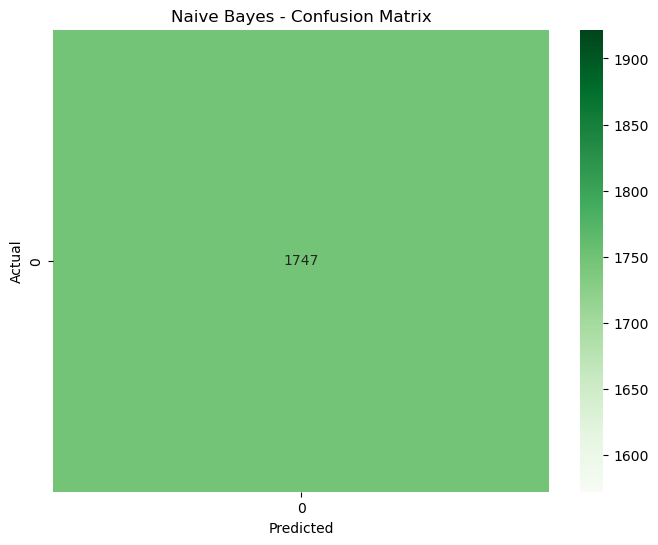

In [73]:
# Import all necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get predictions from Naive Bayes model
y_pred_nb = naive_bayes.predict(X_test)

# Accuracy score
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Classification report
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [69]:
# using logistic Regression
# Create a"documents"
df['text'] = df['slice_file_name'] + ' ' + df['class']

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(df['text'])

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_text,df['classID'])

# Predict and evaluate
print("Accuracy:", model.score(X_text, df['classID']))


Accuracy: 1.0


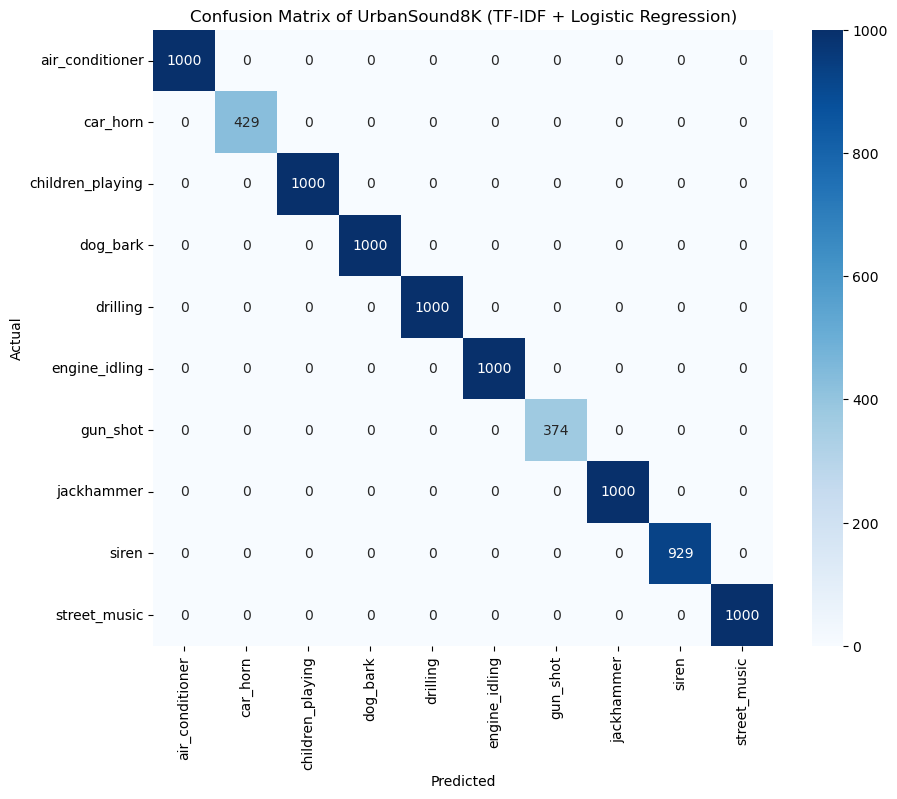

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the same dataset (for demonstration)
y_pred = model.predict(X_text)

# Create confusion matrix
cm = confusion_matrix(df['classID'], y_pred)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(df['class'].unique()), 
            yticklabels=sorted(df['class'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of UrbanSound8K (TF-IDF + Logistic Regression)')
plt.show()
